## ******************************LIBRARY IMPORTAION***************

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras.models import Sequential,Model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense,Flatten,Dropout,SimpleRNN,LSTM,Input,Reshape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from miceforest import ImputationKernel
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

## ******DATA SET IMPORTATION AND PREPROCESSING FOR FIRST DATASET******

In [26]:
df_als=pd.read_csv('data/train2-alsfrs.csv')
df_sensor=pd.read_csv('data/train2-sensor.csv')
df_static=pd.read_csv('data/train2-static.csv')


In [27]:
df_als= df_als.rename(columns={'patient_id':'id','days_from_diagnosis': 'days'})
df_sensor = df_sensor.rename(columns={'patient_id':'id','measure_days_from_diagnosis': 'days'})
df_static = df_static.rename(columns={'patient_id':'id'})
df_als=df_als.drop('source',axis=1)
df_sensor=df_sensor.dropna()
column_prefixes = {}
for col in df_sensor.columns:
    prefix = col.split('_')[0]
    if prefix not in column_prefixes:
        column_prefixes[prefix] = []
    column_prefixes[prefix].append(col)

# Extract lists of columns based on prefixes
beat_columns = column_prefixes.get('beat', [])
heartrate_columns = column_prefixes.get('heart', [])
respiration_columns = column_prefixes.get('respiration', [])
spo2_columns = column_prefixes.get('spo2', [])
steps_columns = column_prefixes.get('steps', [])

# Print the results
print("beat columns:", beat_columns)
print("heartrate columns:", heartrate_columns)
print("respiration columns:", respiration_columns)
print("spo2 columns:", spo2_columns)
print("steps columns:", steps_columns)

# Compute aggregated features for beat_to_beat columns
df_sensor['beat_to_beat_mean'] = df_sensor[beat_columns].mean(axis=1)
df_sensor['beat_to_beat_median'] = df_sensor[beat_columns].median(axis=1)
df_sensor['beat_to_beat_std'] = df_sensor[beat_columns].std(axis=1)
df_sensor['beat_to_beat_min'] = df_sensor[beat_columns].min(axis=1)
df_sensor['beat_to_beat_max'] = df_sensor[beat_columns].max(axis=1)

# Compute aggregated features for heart_rate columns
df_sensor['heart_mean'] = df_sensor[heartrate_columns].mean(axis=1)
df_sensor['heart_median'] = df_sensor[heartrate_columns].median(axis=1)
df_sensor['heart_std'] = df_sensor[heartrate_columns].std(axis=1)
df_sensor['heart_min'] = df_sensor[heartrate_columns].min(axis=1)
df_sensor['heart_max'] = df_sensor[heartrate_columns].max(axis=1)

# Compute aggregated features for respiration columns
df_sensor['respiration_mean'] = df_sensor[respiration_columns].mean(axis=1)
df_sensor['respiration_median'] = df_sensor[respiration_columns].median(axis=1)
df_sensor['respiration_std'] = df_sensor[respiration_columns].std(axis=1)
df_sensor['respiration_min'] = df_sensor[respiration_columns].min(axis=1)
df_sensor['respiration_max'] = df_sensor[respiration_columns].max(axis=1)

# Compute aggregated features for spo2 columns
df_sensor['spo2_mean'] = df_sensor[spo2_columns].mean(axis=1)
df_sensor['spo2_median'] = df_sensor[spo2_columns].median(axis=1)
df_sensor['spo2_std'] = df_sensor[spo2_columns].std(axis=1)
df_sensor['spo2_min'] = df_sensor[spo2_columns].min(axis=1)
df_sensor['spo2_max'] = df_sensor[spo2_columns].max(axis=1)

# Compute aggregated features for steps columns
df_sensor['steps_mean'] = df_sensor[steps_columns].mean(axis=1)
df_sensor['steps_median'] = df_sensor[steps_columns].median(axis=1)
df_sensor['steps_std'] = df_sensor[steps_columns].std(axis=1)
df_sensor['steps_min'] = df_sensor[steps_columns].min(axis=1)
df_sensor['steps_max'] = df_sensor[steps_columns].max(axis=1)

df_sensor = df_sensor.drop(columns=beat_columns + heartrate_columns + respiration_columns + spo2_columns+ steps_columns)

merged_df = pd.merge( df_static,df_als, on=['id'], how='outer')
df=merged_df
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df.shape
df1=df.drop([187,188],axis=0)
df1
df=df1
first_=df.iloc[:,:2]
X=df.iloc[:,2:7]
y=df.iloc[:,7:]
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized[np.isnan(X_normalized)] = 0
input_layer = Input(shape=(X_normalized.shape[1],))
encoded = Dense(2, activation='relu')(input_layer)
decoded = Dense(X_normalized.shape[1], activation='linear')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_normalized, X_normalized,epochs=100,batch_size=1)
imputed_data = autoencoder.predict(X_normalized)
imputed_data = scaler.inverse_transform(imputed_data)
imputed_df = pd.DataFrame(imputed_data, columns=X.columns)

beat columns: ['beat_to_beat_AI', 'beat_to_beat_C2a', 'beat_to_beat_C2d', 'beat_to_beat_Ca', 'beat_to_beat_Cd', 'beat_to_beat_GI', 'beat_to_beat_HTI', 'beat_to_beat_IALS', 'beat_to_beat_PAS', 'beat_to_beat_PI', 'beat_to_beat_PIP', 'beat_to_beat_PSS', 'beat_to_beat_SD1a', 'beat_to_beat_SD1d', 'beat_to_beat_SDNNa', 'beat_to_beat_SDNNd', 'beat_to_beat_SI', 'beat_to_beat_csi', 'beat_to_beat_csi_modified', 'beat_to_beat_cvi', 'beat_to_beat_cvsd', 'beat_to_beat_hcvNN', 'beat_to_beat_iqrNN', 'beat_to_beat_madNN', 'beat_to_beat_meanNN', 'beat_to_beat_medianNN', 'beat_to_beat_pNN20', 'beat_to_beat_pNN50', 'beat_to_beat_rmssd', 'beat_to_beat_sd1', 'beat_to_beat_sd1sd2', 'beat_to_beat_sd2', 'beat_to_beat_sdNN', 'beat_to_beat_sdNNI1', 'beat_to_beat_sdNNI2', 'beat_to_beat_sdNNI5', 'beat_to_beat_sdaNN1', 'beat_to_beat_sdaNN2', 'beat_to_beat_sdaNN5', 'beat_to_beat_sdsd']
heartrate columns: ['heart_rate_baseline', 'heart_rate_linear_trend', 'heart_rate_max_time', 'heart_rate_maximum', 'heart_rate_mean

In [28]:
df = pd.concat([first_,imputed_df, y], axis=1)
merged_df = pd.merge( df_sensor,df, on=['id','days'], how='outer')
merged=merged_df.dropna(subset='Q1')
merged
x_data=merged.iloc[:,2:98]
mk=ImputationKernel(data=x_data,save_all_iterations=True,random_state=0)
mk.mice(2)
m_data=mk.complete_data()
m_data.head()

,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,beat_to_beat_max,heart_mean,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
47,8.0,1631.0,1639.25,142.0,241.248120,6.701384,1245.108357,0.0,7875.732781,9225.241183,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,3.0,1.0
123,248.0,1766.0,2014.25,3162.0,362.723268,9.921813,1950.042947,0.0,12359.932766,9378.302638,...,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
194,393.0,1766.0,2159.25,3685.0,246.255494,9.050092,1267.505930,0.0,8029.786680,4429.200499,...,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
285,69.0,1711.0,1780.25,104.0,216.344360,6.316873,1116.862835,0.0,7065.715583,12055.349844,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
408,29.0,1711.0,1740.25,20.0,176.890448,5.613089,884.702444,0.0,5586.499504,3684.513184,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0


In [29]:
df = pd.concat([first_,imputed_df, y], axis=1)
merged_df = pd.merge( df_sensor,df, on=['id','days'], how='outer')
merged=merged_df.dropna(subset='Q1')
merged
x_data=merged.iloc[:,2:98]
mk=ImputationKernel(data=x_data,save_all_iterations=True,random_state=0)
mk.mice(2)
m_data=mk.complete_data()
m_data.head()
first_=merged.iloc[:,:2]
y=merged.iloc[:,98:]
df = pd.concat([first_,m_data, y], axis=1)

first_df=df
first_df

,id,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
47,fd228ba0,993,8.0,1631.0,1639.25,142.0,241.248120,6.701384,1245.108357,0.0,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,3.0,1.0
123,c53a1583,87,248.0,1766.0,2014.25,3162.0,362.723268,9.921813,1950.042947,0.0,...,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
194,c53a1583,266,393.0,1766.0,2159.25,3685.0,246.255494,9.050092,1267.505930,0.0,...,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
285,fbeebbbb,775,69.0,1711.0,1780.25,104.0,216.344360,6.316873,1116.862835,0.0,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
408,fbeebbbb,929,29.0,1711.0,1740.25,20.0,176.890448,5.613089,884.702444,0.0,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9c810836,8663,143.0,1726.0,1756.25,4491.0,409.729132,11.201272,2384.344569,0.0,...,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
7034,9c810836,8782,8.0,1706.0,1713.25,992.0,556.831504,10.029482,3233.025141,0.0,...,4.0,3.0,3.0,3.0,4.0,4.0,1.0,4.0,4.0,4.0
7035,df4c99f5,8658,64.0,1631.0,1736.25,998.0,597.402491,11.064071,3818.708266,0.0,...,4.0,3.0,1.0,1.0,1.0,2.0,0.0,4.0,4.0,4.0
7036,9cb5cd37,97,221.0,1726.0,1832.25,1830.0,424.672229,9.216235,2380.131002,0.0,...,4.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0


## ******DATA SET IMPORTATION AND PREPROCESSING FOR SECOND DATASET******

In [30]:
df_als=pd.read_csv('data/train-alsfrs.csv')
df_sensor=pd.read_csv('data/train-sensor.csv')
df_static=pd.read_csv('data/train-static.csv')

In [31]:
df_als= df_als.rename(columns={'patient_id':'id','days_from_diagnosis': 'days'})
df_sensor = df_sensor.rename(columns={'patient_id':'id','measure_days_from_diagnosis': 'days'})
df_static = df_static.rename(columns={'patient_id':'id'})


In [32]:
df_als
df_als=df_als.drop('source',axis=1)
df_als

,id,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,829,3,4,4,3,1,2,3,2,1,1,0,2
1,fd228ba0,863,3,4,4,3,1,2,3,2,1,1,0,2
2,fd228ba0,941,3,4,4,2,1,2,3,1,0,1,0,2
3,fd228ba0,974,3,4,4,3,1,2,3,1,0,1,0,2
4,fd228ba0,1007,3,4,4,2,1,1,3,1,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,5f4c8750,1203,3,4,4,3,4,3,3,2,2,2,4,4
297,c0d49276,103,4,4,4,4,4,4,4,2,3,4,4,4
298,c0d49276,135,4,4,4,4,4,2,3,2,1,4,4,4
299,c0d49276,167,4,4,4,4,4,2,3,2,1,4,4,4


In [33]:
df_sensor

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,spo2_P,spo2_POD,spo2_RG,spo2_SD,spo2_ZC,steps_12_am-6_am,steps_12_pm-6_pm,steps_6_am-12_pm,total_calories,total_steps
0,fd228ba0,800,7.0,1631.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,23.0,50.0,1638.25,82.0
1,fd228ba0,801,6.0,1631.0,NaN,NaN,NaN,NaN,NaN,NaN,...,81.666667,0.269737,15.666667,2.943160,27.0,26.0,0.0,121.0,1637.25,147.0
2,fd228ba0,802,NaN,NaN,49.999707,0.492208,0.507792,0.492233,0.507767,50.000000,...,84.333333,0.405738,13.666667,3.055109,8.0,NaN,NaN,NaN,NaN,NaN
3,fd228ba0,803,34.0,1631.0,49.726549,0.485366,0.514634,0.485469,0.514531,49.713790,...,83.666667,0.446494,16.166667,3.814763,18.0,0.0,13.0,67.0,1665.25,121.0
4,fd228ba0,804,7.0,1631.0,50.571503,0.490403,0.509597,0.490584,0.509416,50.648942,...,84.753333,0.000000,7.333333,2.338218,1.0,28.0,0.0,111.0,1638.25,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13941,c0d49276,103,84.0,1731.0,49.834021,0.495811,0.504189,0.495786,0.504214,49.854366,...,84.000000,0.592255,16.000000,2.784654,44.0,0.0,86.0,138.0,1815.25,264.0
13942,c0d49276,104,18.0,1731.0,50.179489,0.517709,0.482291,0.517311,0.482689,50.157936,...,82.526667,0.225806,17.333333,4.093733,6.0,0.0,11.0,82.0,1749.25,125.0
13943,c0d49276,105,153.0,1731.0,49.533121,0.504001,0.495999,0.504016,0.495984,49.542399,...,86.000000,0.327731,13.000000,2.819238,14.0,0.0,103.0,117.0,1884.25,249.0
13944,c0d49276,106,98.0,1731.0,50.128646,0.495741,0.504259,0.495807,0.504193,50.147842,...,85.666667,0.297376,17.000000,3.148154,21.0,0.0,280.0,68.0,1829.25,414.0


# Feature Engineering

In [34]:
column_prefixes = {}
for col in df_sensor.columns:
    prefix = col.split('_')[0]
    if prefix not in column_prefixes:
        column_prefixes[prefix] = []
    column_prefixes[prefix].append(col)

# Extract lists of columns based on prefixes
beat_columns = column_prefixes.get('beat', [])
heartrate_columns = column_prefixes.get('heart', [])
respiration_columns = column_prefixes.get('respiration', [])
spo2_columns = column_prefixes.get('spo2', [])
steps_columns = column_prefixes.get('steps', [])

# Print the results
print("beat columns:", beat_columns)
print("heartrate columns:", heartrate_columns)
print("respiration columns:", respiration_columns)
print("spo2 columns:", spo2_columns)
print("steps columns:", steps_columns)


beat columns: ['beat_to_beat_AI', 'beat_to_beat_C2a', 'beat_to_beat_C2d', 'beat_to_beat_Ca', 'beat_to_beat_Cd', 'beat_to_beat_GI', 'beat_to_beat_HTI', 'beat_to_beat_IALS', 'beat_to_beat_PAS', 'beat_to_beat_PI', 'beat_to_beat_PIP', 'beat_to_beat_PSS', 'beat_to_beat_SD1a', 'beat_to_beat_SD1d', 'beat_to_beat_SDNNa', 'beat_to_beat_SDNNd', 'beat_to_beat_SI', 'beat_to_beat_csi', 'beat_to_beat_csi_modified', 'beat_to_beat_cvi', 'beat_to_beat_cvsd', 'beat_to_beat_hcvNN', 'beat_to_beat_iqrNN', 'beat_to_beat_madNN', 'beat_to_beat_meanNN', 'beat_to_beat_medianNN', 'beat_to_beat_pNN20', 'beat_to_beat_pNN50', 'beat_to_beat_rmssd', 'beat_to_beat_sd1', 'beat_to_beat_sd1sd2', 'beat_to_beat_sd2', 'beat_to_beat_sdNN', 'beat_to_beat_sdNNI1', 'beat_to_beat_sdNNI2', 'beat_to_beat_sdNNI5', 'beat_to_beat_sdaNN1', 'beat_to_beat_sdaNN2', 'beat_to_beat_sdaNN5', 'beat_to_beat_sdsd']
heartrate columns: ['heart_rate_baseline', 'heart_rate_linear_trend', 'heart_rate_max_time', 'heart_rate_maximum', 'heart_rate_mean

In [35]:
# Compute aggregated features for beat_to_beat columns
df_sensor['beat_to_beat_mean'] = df_sensor[beat_columns].mean(axis=1)
df_sensor['beat_to_beat_median'] = df_sensor[beat_columns].median(axis=1)
df_sensor['beat_to_beat_std'] = df_sensor[beat_columns].std(axis=1)
df_sensor['beat_to_beat_min'] = df_sensor[beat_columns].min(axis=1)
df_sensor['beat_to_beat_max'] = df_sensor[beat_columns].max(axis=1)

# Compute aggregated features for heart_rate columns
df_sensor['heart_mean'] = df_sensor[heartrate_columns].mean(axis=1)
df_sensor['heart_median'] = df_sensor[heartrate_columns].median(axis=1)
df_sensor['heart_std'] = df_sensor[heartrate_columns].std(axis=1)
df_sensor['heart_min'] = df_sensor[heartrate_columns].min(axis=1)
df_sensor['heart_max'] = df_sensor[heartrate_columns].max(axis=1)

# Compute aggregated features for respiration columns
df_sensor['respiration_mean'] = df_sensor[respiration_columns].mean(axis=1)
df_sensor['respiration_median'] = df_sensor[respiration_columns].median(axis=1)
df_sensor['respiration_std'] = df_sensor[respiration_columns].std(axis=1)
df_sensor['respiration_min'] = df_sensor[respiration_columns].min(axis=1)
df_sensor['respiration_max'] = df_sensor[respiration_columns].max(axis=1)

# Compute aggregated features for spo2 columns
df_sensor['spo2_mean'] = df_sensor[spo2_columns].mean(axis=1)
df_sensor['spo2_median'] = df_sensor[spo2_columns].median(axis=1)
df_sensor['spo2_std'] = df_sensor[spo2_columns].std(axis=1)
df_sensor['spo2_min'] = df_sensor[spo2_columns].min(axis=1)
df_sensor['spo2_max'] = df_sensor[spo2_columns].max(axis=1)

# Compute aggregated features for steps columns
df_sensor['steps_mean'] = df_sensor[steps_columns].mean(axis=1)
df_sensor['steps_median'] = df_sensor[steps_columns].median(axis=1)
df_sensor['steps_std'] = df_sensor[steps_columns].std(axis=1)
df_sensor['steps_min'] = df_sensor[steps_columns].min(axis=1)
df_sensor['steps_max'] = df_sensor[steps_columns].max(axis=1)

df_sensor = df_sensor.drop(columns=beat_columns + heartrate_columns + respiration_columns + spo2_columns+ steps_columns)

In [36]:
df_sensor

,id,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,...,spo2_mean,spo2_median,spo2_std,spo2_min,spo2_max,steps_mean,steps_median,steps_std,steps_min,steps_max
0,fd228ba0,800,7.0,1631.0,1638.25,82.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24.333333,23.0,25.026652,0.0,50.0
1,fd228ba0,801,6.0,1631.0,1637.25,147.0,NaN,NaN,NaN,NaN,...,32.575708,15.666667,35.759429,0.269737,90.333333,49.000000,26.0,63.694584,0.0,121.0
2,fd228ba0,802,NaN,NaN,NaN,NaN,799.516887,7.203813,4595.337842,0.0,...,36.084420,8.000000,40.517731,0.405738,88.168551,NaN,NaN,NaN,NaN,NaN
3,fd228ba0,803,34.0,1631.0,1665.25,121.0,387.236444,9.511131,2104.086413,0.0,...,38.791548,18.000000,40.348907,0.446494,106.273063,26.666667,13.0,35.529331,0.0,67.0
4,fd228ba0,804,7.0,1631.0,1638.25,139.0,211.824702,8.298575,1068.232596,0.0,...,29.681936,1.403509,41.488680,0.000000,89.000000,46.333333,28.0,57.726366,0.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13941,c0d49276,103,84.0,1731.0,1815.25,264.0,283.459752,9.066580,1489.541509,0.0,...,34.973955,16.513761,36.385334,0.592255,91.666667,74.666667,86.0,69.694572,0.0,138.0
13942,c0d49276,104,18.0,1731.0,1749.25,125.0,230.832608,7.787738,1186.908852,0.0,...,30.913357,8.468468,37.684545,0.225806,94.666667,31.000000,11.0,44.508426,0.0,82.0
13943,c0d49276,105,153.0,1731.0,1884.25,249.0,368.584738,7.233637,2022.348792,0.0,...,31.396300,14.000000,37.788885,0.327731,94.000000,73.333333,103.0,63.893140,0.0,117.0
13944,c0d49276,106,98.0,1731.0,1829.25,414.0,349.212251,8.201446,1902.970910,0.0,...,33.430577,17.000000,38.190033,0.297376,94.333333,116.000000,68.0,146.041090,0.0,280.0


In [37]:
df_sensor.isnull().sum()

id                        0
days                      0
active_calories          62
basal_calories           62
total_calories           62
total_steps              62
beat_to_beat_mean       766
beat_to_beat_median     766
beat_to_beat_std        766
beat_to_beat_min        766
beat_to_beat_max        766
heart_mean              766
heart_median            766
heart_std               766
heart_min               766
heart_max               766
respiration_mean       2573
respiration_median     2573
respiration_std        2573
respiration_min        2573
respiration_max        2573
spo2_mean              5251
spo2_median            5251
spo2_std               5251
spo2_min               5251
spo2_max               5251
steps_mean               62
steps_median             62
steps_std                62
steps_min                62
steps_max                62
dtype: int64

## ***************DATA PREPROCESSING AND EXPLORATION***************

In [38]:
df_sensor=df_sensor.dropna()
df_sensor

,id,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,...,spo2_mean,spo2_median,spo2_std,spo2_min,spo2_max,steps_mean,steps_median,steps_std,steps_min,steps_max
3,fd228ba0,803,34.0,1631.0,1665.25,121.0,387.236444,9.511131,2104.086413,0.0,...,38.791548,18.000000,40.348907,0.446494,106.273063,26.666667,13.0,35.529331,0.0,67.0
4,fd228ba0,804,7.0,1631.0,1638.25,139.0,211.824702,8.298575,1068.232596,0.0,...,29.681936,1.403509,41.488680,0.000000,89.000000,46.333333,28.0,57.726366,0.0,111.0
24,fd228ba0,829,31.0,1631.0,1662.25,40.0,244.859065,7.945868,1267.887806,0.0,...,35.250417,17.551963,37.723110,0.364198,91.000000,13.333333,11.0,14.640128,0.0,29.0
25,fd228ba0,830,70.0,1631.0,1701.25,194.0,703.886075,6.187262,4028.033185,0.0,...,33.842627,8.000000,40.197432,0.000000,100.000000,16.666667,9.0,21.548395,0.0,41.0
27,fd228ba0,832,110.0,1631.0,1741.25,255.0,260.750258,8.972553,1357.323064,0.0,...,34.213140,11.666667,39.283883,0.411429,94.285714,76.000000,100.0,67.290415,0.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13940,c0d49276,102,210.0,1731.0,1941.25,609.0,224.584201,8.070300,1158.222222,0.0,...,27.891636,7.072692,39.629870,0.050420,93.117503,176.666667,34.0,277.072794,0.0,496.0
13941,c0d49276,103,84.0,1731.0,1815.25,264.0,283.459752,9.066580,1489.541509,0.0,...,34.973955,16.513761,36.385334,0.592255,91.666667,74.666667,86.0,69.694572,0.0,138.0
13942,c0d49276,104,18.0,1731.0,1749.25,125.0,230.832608,7.787738,1186.908852,0.0,...,30.913357,8.468468,37.684545,0.225806,94.666667,31.000000,11.0,44.508426,0.0,82.0
13943,c0d49276,105,153.0,1731.0,1884.25,249.0,368.584738,7.233637,2022.348792,0.0,...,31.396300,14.000000,37.788885,0.327731,94.000000,73.333333,103.0,63.893140,0.0,117.0


In [39]:
df_static

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi
0,fd228ba0,M,2.002740,63,44.0,60.0,21.513859
1,c53a1583,M,0.000000,38,82.0,86.0,26.543210
2,fbeebbbb,M,21.180822,48,49.0,64.0,21.138856
3,0615d2f8,F,1.002740,67,73.0,66.0,27.120316
4,892d81f6,F,2.416438,49,100.0,70.0,28.040378
5,9d0b55d0,M,0.410959,28,84.0,85.0,28.400548
6,025f1df9,M,0.328767,58,96.0,79.0,27.660096
7,88b5b1aa,M,0.498630,58,94.0,69.0,24.447279
8,72c46573,M,0.252055,53,90.0,69.0,23.875433
9,527bc702,M,0.915068,64,95.0,77.0,26.027582


In [40]:
merged_df = pd.merge( df_static,df_als, on=['id'], how='outer')

## LABEL ENCODING CATEGORICAL DATA

In [41]:
df=merged_df
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df.shape

(302, 20)

In [42]:
df.columns.get_loc('Q1')

8

## Removing inappropriate Gender

In [43]:
df

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
299,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,186.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,4.0,4.0,4.0
300,479620e5,2,NaN,NaN,NaN,NaN,NaN,913.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,1.0,1.0,4.0,4.0,2.0


In [44]:
df1=df.drop([300,301],axis=0)
df1

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5f4c8750,0,0.167123,44.0,85.0,62.0,23.918830,1203.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,4.0,4.0
296,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,103.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,4.0
297,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [45]:
df=df1

In [46]:
df.isnull().sum()

id                   0
sex                  0
diagnostic_delay     0
age_at_diagnosis     0
FVC                 37
weight               4
bmi                  4
days                 1
Q1                   1
Q2                   1
Q3                   1
Q4                   1
Q5                   1
Q6                   1
Q7                   1
Q8                   1
Q9                   1
Q10                  1
Q11                  1
Q12                  1
dtype: int64

In [47]:
first_=df.iloc[:,:2]
first_

,id,sex
0,fd228ba0,1
1,fd228ba0,1
2,fd228ba0,1
3,fd228ba0,1
4,fd228ba0,1
...,...,...
295,5f4c8750,0
296,c0d49276,1
297,c0d49276,1
298,c0d49276,1


## Handling missing values using Autoencoders

In [48]:
X=df.iloc[:,2:7]
y=df.iloc[:,7:]
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized[np.isnan(X_normalized)] = 0
input_layer = Input(shape=(X_normalized.shape[1],))
encoded = Dense(2, activation='relu')(input_layer)
decoded = Dense(X_normalized.shape[1], activation='linear')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_normalized, X_normalized,epochs=100,batch_size=1)
imputed_data = autoencoder.predict(X_normalized)
imputed_data = scaler.inverse_transform(imputed_data)
imputed_df = pd.DataFrame(imputed_data, columns=X.columns)

Epoch 1/100
300/300 [==============================] - 2s 3ms/step - loss: 0.9321
Epoch 2/100
300/300 [==============================] - 1s 3ms/step - loss: 0.8365
Epoch 3/100
300/300 [==============================] - 1s 4ms/step - loss: 0.7659
Epoch 4/100
300/300 [==============================] - 1s 3ms/step - loss: 0.7095
Epoch 5/100
300/300 [==============================] - 1s 4ms/step - loss: 0.6682
Epoch 6/100
300/300 [==============================] - 1s 3ms/step - loss: 0.6373
Epoch 7/100
300/300 [==============================] - 1s 5ms/step - loss: 0.6120
Epoch 8/100
300/300 [==============================] - 1s 4ms/step - loss: 0.5910
Epoch 9/100
300/300 [==============================] - 1s 4ms/step - loss: 0.5726
Epoch 10/100
300/300 [==============================] - 1s 4ms/step - loss: 0.5546
Epoch 11/100
300/300 [==============================] - 1s 4ms/step - loss: 0.5375
Epoch 12/100
300/300 [==============================] - 1s 4ms/step - loss: 0.5220
Epoch 13/100


In [49]:
df = pd.concat([first_,imputed_df, y], axis=1)
df

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,1,2.607538,63.844246,73.418694,55.209827,20.392694,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,1,2.607538,63.844246,73.418694,55.209827,20.392694,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,1,2.607538,63.844246,73.418694,55.209827,20.392694,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,1,2.607538,63.844246,73.418694,55.209827,20.392694,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,1,2.607538,63.844246,73.418694,55.209827,20.392694,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5f4c8750,0,2.013316,44.084843,80.843452,67.685722,23.431900,1203.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,4.0,4.0
296,c0d49276,1,1.543072,45.883820,83.811073,73.915985,25.113737,103.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,4.0
297,c0d49276,1,1.543072,45.883820,83.811073,73.915985,25.113737,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,1,1.543072,45.883820,83.811073,73.915985,25.113737,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [50]:
merged_df = pd.merge( df_sensor,df, on=['id','days'], how='outer')

In [51]:
merged_df

,id,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,803.0,34.0,1631.0,1665.25,121.0,387.236444,9.511131,2104.086413,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fd228ba0,804.0,7.0,1631.0,1638.25,139.0,211.824702,8.298575,1068.232596,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fd228ba0,829.0,31.0,1631.0,1662.25,40.0,244.859065,7.945868,1267.887806,0.0,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
3,fd228ba0,830.0,70.0,1631.0,1701.25,194.0,703.886075,6.187262,4028.033185,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fd228ba0,832.0,110.0,1631.0,1741.25,255.0,260.750258,8.972553,1357.323064,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8792,df4c99f5,8658.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
8793,df4c99f5,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
8794,c0d49276,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
8795,c0d49276,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [52]:
merged=merged_df.dropna(subset='Q1')
merged

,id,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
2,fd228ba0,829.0,31.0,1631.0,1662.25,40.0,244.859065,7.945868,1267.887806,0.0,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
20,fd228ba0,863.0,542.0,1631.0,2173.25,339.0,706.635153,8.383914,4067.034029,0.0,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
82,fd228ba0,941.0,98.0,1631.0,1729.25,278.0,307.147206,7.018317,1647.003493,0.0,...,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
112,fd228ba0,974.0,7.0,1631.0,1638.25,154.0,282.404289,9.097852,1437.120119,0.0,...,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
141,fd228ba0,1007.0,19.0,1631.0,1650.25,54.0,575.050447,10.945307,3225.199876,0.0,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8792,df4c99f5,8658.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
8793,df4c99f5,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
8794,c0d49276,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
8795,c0d49276,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [53]:
print(merged.columns.get_loc('Q1'))

37


## ***************MISSING VALUES HANDLING USING MULTIPLE IMPORTATION***************

In [54]:
x_data=merged.iloc[:,2:37]
mk=ImputationKernel(data=x_data,save_all_iterations=True,random_state=0)
mk.mice(2)
m_data=mk.complete_data()
m_data.head()

,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,beat_to_beat_max,heart_mean,...,steps_median,steps_std,steps_min,steps_max,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi
2,31.0,1631.0,1662.25,40.0,244.859065,7.945868,1267.887806,0.0,8025.037765,9039.588286,...,11.0,14.640128,0.0,29.0,1.0,2.607538,63.844246,73.418694,55.209827,20.392694
20,542.0,1631.0,2173.25,339.0,706.635153,8.383914,4067.034029,0.0,25773.042990,12654.973871,...,0.0,42.723920,0.0,74.0,1.0,2.607538,63.844246,73.418694,55.209827,20.392694
82,98.0,1631.0,1729.25,278.0,307.147206,7.018317,1647.003493,0.0,10433.766280,5236.624270,...,39.0,18.175075,13.0,48.0,1.0,2.607538,63.844246,73.418694,55.209827,20.392694
112,7.0,1631.0,1638.25,154.0,282.404289,9.097852,1437.120119,0.0,8977.773071,5814.282324,...,13.0,8.144528,0.0,15.0,1.0,2.607538,63.844246,73.418694,55.209827,20.392694
141,19.0,1631.0,1650.25,54.0,575.050447,10.945307,3225.199876,0.0,20442.681130,7176.736981,...,13.0,8.082904,7.0,23.0,1.0,2.607538,63.844246,73.418694,55.209827,20.392694


In [55]:
first_=merged.iloc[:,:2]
y=merged.iloc[:,37:]
df = pd.concat([first_,m_data, y], axis=1)
df

,id,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
2,fd228ba0,829.0,31.0,1631.0,1662.25,40.0,244.859065,7.945868,1267.887806,0.0,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
20,fd228ba0,863.0,542.0,1631.0,2173.25,339.0,706.635153,8.383914,4067.034029,0.0,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
82,fd228ba0,941.0,98.0,1631.0,1729.25,278.0,307.147206,7.018317,1647.003493,0.0,...,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
112,fd228ba0,974.0,7.0,1631.0,1638.25,154.0,282.404289,9.097852,1437.120119,0.0,...,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
141,fd228ba0,1007.0,19.0,1631.0,1650.25,54.0,575.050447,10.945307,3225.199876,0.0,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8792,df4c99f5,8658.0,374.0,1480.0,2090.25,3872.0,564.958685,10.507229,2966.280955,0.0,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
8793,df4c99f5,8762.0,374.0,1555.0,2095.25,1546.0,591.477078,9.462085,3631.410608,0.0,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
8794,c0d49276,135.0,92.0,1721.0,1797.25,24.0,367.369071,4.710305,1981.802859,0.0,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
8795,c0d49276,167.0,112.0,1721.0,1876.25,2489.0,440.063569,11.297552,2374.775083,0.0,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [56]:
second_df=df
df=pd.concat([first_df,second_df])
df

,id,days,active_calories,basal_calories,total_calories,total_steps,beat_to_beat_mean,beat_to_beat_median,beat_to_beat_std,beat_to_beat_min,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
47,fd228ba0,993.0,8.0,1631.0,1639.25,142.0,241.248120,6.701384,1245.108357,0.0,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,3.0,1.0
123,c53a1583,87.0,248.0,1766.0,2014.25,3162.0,362.723268,9.921813,1950.042947,0.0,...,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
194,c53a1583,266.0,393.0,1766.0,2159.25,3685.0,246.255494,9.050092,1267.505930,0.0,...,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
285,fbeebbbb,775.0,69.0,1711.0,1780.25,104.0,216.344360,6.316873,1116.862835,0.0,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
408,fbeebbbb,929.0,29.0,1711.0,1740.25,20.0,176.890448,5.613089,884.702444,0.0,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8792,df4c99f5,8658.0,374.0,1480.0,2090.25,3872.0,564.958685,10.507229,2966.280955,0.0,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
8793,df4c99f5,8762.0,374.0,1555.0,2095.25,1546.0,591.477078,9.462085,3631.410608,0.0,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
8794,c0d49276,135.0,92.0,1721.0,1797.25,24.0,367.369071,4.710305,1981.802859,0.0,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
8795,c0d49276,167.0,112.0,1721.0,1876.25,2489.0,440.063569,11.297552,2374.775083,0.0,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [57]:
df=df.drop(['id'],axis=1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 47 to 8796
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   days                 486 non-null    float64
 1   active_calories      486 non-null    float64
 2   basal_calories       486 non-null    float64
 3   total_calories       486 non-null    float64
 4   total_steps          486 non-null    float64
 5   beat_to_beat_mean    486 non-null    float64
 6   beat_to_beat_median  486 non-null    float64
 7   beat_to_beat_std     486 non-null    float64
 8   beat_to_beat_min     486 non-null    float64
 9   beat_to_beat_max     486 non-null    float64
 10  heart_mean           486 non-null    float64
 11  heart_median         486 non-null    float64
 12  heart_std            486 non-null    float64
 13  heart_min            486 non-null    float64
 14  heart_max            486 non-null    float64
 15  respiration_mean     486 non-null    f

# Data samples creation

In [59]:
def bootstrap_sample(sample, n_samples=None):
    if n_samples is None:
        n_samples = len(sample)
    indices = np.random.choice(len(sample), size=n_samples, replace=True)
    return sample[indices]

df2=df
s=df2.columns
df2=np.array(df2)
df2 = bootstrap_sample(df2, n_samples=1000)
df2=pd.DataFrame(df2,columns=s)
df=pd.concat([df,df2])

In [60]:
df.isnull().sum().max()

0

## ***********************DATA SPLITTING***************

In [61]:
x1 = df.iloc[:,:36]
y = df.iloc[:,36:]

In [62]:
x1.shape

(1486, 36)

In [63]:
y

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
47,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,3.0,1.0
123,4.0,4.0,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
194,4.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
285,4.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
408,4.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,0.0,3.0,4.0,4.0
996,4.0,4.0,4.0,2.0,1.0,1.0,1.0,2.0,0.0,4.0,3.0,4.0
997,0.0,2.0,2.0,3.0,0.0,0.0,0.0,2.0,1.0,4.0,4.0,3.0
998,4.0,4.0,4.0,3.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0


## ***************FEATURE SELECTION***************

['steps_median', 'days', 'age_at_diagnosis', 'basal_calories', 'FVC', 'total_calories', 'weight', 'bmi', 'diagnostic_delay', 'steps_std', 'active_calories', 'spo2_min', 'respiration_min', 'spo2_median', 'total_steps', 'steps_max', 'spo2_mean', 'respiration_median', 'spo2_std', 'beat_to_beat_median', 'respiration_mean', 'heart_median', 'steps_mean', 'respiration_std', 'heart_mean', 'spo2_max', 'respiration_max', 'heart_max', 'beat_to_beat_max', 'steps_min']


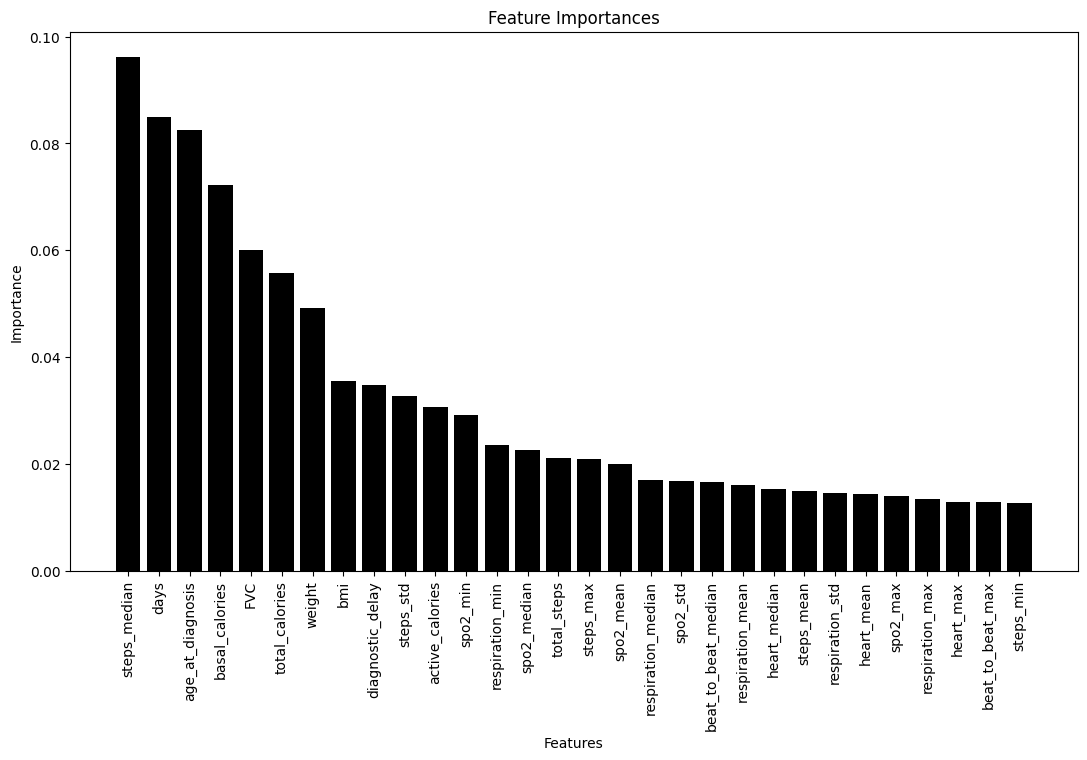

In [64]:
rf = RandomForestRegressor()
rf.fit(x1,y)
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': x1.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
ifs=importance_df['Feature'][:30]
selected_columns = list(ifs)
print(selected_columns)

plt.figure(figsize=(13,7))
plt.bar(ifs, importance_df['Importance'][:30], color='black')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

In [65]:
x=x1[['steps_median', 'days', 'age_at_diagnosis', 'basal_calories', 'FVC', 'total_calories', 'weight', 'bmi', 'diagnostic_delay', 'steps_std', 'active_calories', 'spo2_min', 'respiration_min', 'spo2_median', 'total_steps', 'steps_max', 'spo2_mean', 'respiration_median', 'spo2_std', 'beat_to_beat_median', 'respiration_mean', 'heart_median', 'steps_mean', 'respiration_std', 'heart_mean', 'spo2_max', 'respiration_max', 'heart_max', 'beat_to_beat_max', 'steps_min']]
x


,age_at_diagnosis,diagnostic_delay,total_steps,basal_calories,days,bmi,FVC,weight,steps_median,total_calories,...,steps_min,beat_to_beat_mean,spo2_max,spo2_mean,spo2_std,beat_to_beat_std,heart_mean,respiration_max,respiration_mean,respiration_std
47,59.602592,5.683635,142.0,1631.0,993.0,20.370903,69.652267,57.343548,24.0,1639.25,...,0.0,241.248120,98.901099,39.658795,38.875508,1245.108357,9225.241183,2.128086,0.672977,0.650713
123,50.458851,2.555681,3162.0,1766.0,87.0,28.154718,86.387840,86.421455,420.0,2014.25,...,121.0,362.723268,91.666667,34.012785,39.266777,1950.042947,9378.302638,21.083323,3.538605,5.449169
194,50.458851,2.555681,3685.0,1766.0,266.0,28.154718,86.387840,86.421455,1482.0,2159.25,...,679.0,246.255494,100.000000,36.110725,42.091887,1267.505930,4429.200499,17.316492,2.972472,4.540016
285,44.744549,18.981884,104.0,1711.0,775.0,21.111479,39.376141,64.727341,16.0,1780.25,...,0.0,216.344360,123.076923,38.659654,44.877185,1116.862835,12055.349844,26.882814,3.922574,6.989276
408,44.744549,18.981884,20.0,1711.0,929.0,21.111479,39.376141,64.727341,0.0,1740.25,...,0.0,176.890448,94.100295,35.199053,38.829459,884.702444,3684.513184,33.745282,4.781374,8.819471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59.840950,-1.279777,5212.0,1616.0,401.0,24.731892,91.242920,71.865181,1293.0,1881.25,...,0.0,350.686204,92.909627,34.567864,43.577341,1887.559193,6652.152470,8.316040,1.648283,2.552685
996,45.229355,2.231078,1576.0,1600.0,8749.0,31.657808,91.380821,99.875748,448.0,2270.25,...,94.0,193.905651,90.008523,34.955881,37.091395,994.563255,9941.804902,31.571242,4.480628,8.173348
997,55.907215,0.208371,7521.0,1666.0,282.0,26.244747,89.582428,78.228584,2941.0,2178.25,...,0.0,664.688621,93.666667,38.132993,39.443099,3872.116324,3787.315874,17.316492,3.062884,5.027694
998,47.747181,0.919019,7219.0,1721.0,113.0,30.922419,93.567825,96.582619,2479.0,2098.25,...,122.0,380.049833,89.666667,37.183090,39.521413,2151.252860,6252.131890,23.266383,3.751364,6.460484


In [66]:
sc = MinMaxScaler()
x = sc.fit_transform(x)
sc = StandardScaler()
x = sc.fit_transform(x)

In [67]:
y

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
47,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,3.0,1.0
123,4.0,4.0,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
194,4.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
285,4.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
408,4.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,0.0,3.0,4.0,4.0
996,4.0,4.0,4.0,2.0,1.0,1.0,1.0,2.0,0.0,4.0,3.0,4.0
997,0.0,2.0,2.0,3.0,0.0,0.0,0.0,2.0,1.0,4.0,4.0,3.0
998,4.0,4.0,4.0,3.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0


## ***************SPLITTING INTO TRAINING AND TESTING /MODEL DEVELOPMENT**************

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.1,random_state=42)

## ENSEMBLE MODELS

In [69]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)
rf_pred=np.round((np.clip(rf_pred,0,4))).astype(int)
print('MAE for RandomForest:',mean_absolute_error(rf_pred,y_test))
print('RMSE for RandomForest:',np.sqrt(mean_squared_error(rf_pred,y_test)))
print('R-sqaured value for RandomForest:',r2_score(rf_pred,y_test))

MAE for RandomForest: 0.06655480984340045
RMSE for RandomForest: 0.2906060934770562
R-sqaured value for RandomForest: 0.9317267869379499


In [70]:
bg_model=BaggingRegressor(estimator=DecisionTreeRegressor())
bg_model.fit(x_train,y_train)
bg_pred=bg_model.predict(x_test)
bg_pred=np.round((np.clip(bg_pred,0,4))).astype(int)
print('MAE for Bagging Model:',mean_absolute_error(bg_pred,y_test))
print('RMSE for Bagging Model:',np.sqrt(mean_squared_error(bg_pred,y_test)))
print('R-sqaured value for Bagging Model:',r2_score(bg_pred,y_test))

MAE for Bagging Model: 0.0889261744966443
RMSE for Bagging Model: 0.3251225891668821
R-sqaured value for Bagging Model: 0.9074354554355687


In [71]:
xg_model=XGBRegressor()
xg_model.fit(x_train,y_train)
xg_pred=xg_model.predict(x_test)
xg_pred=np.round((np.clip(xg_pred,0,4))).astype(int)
print('MAE for xgboost:',mean_absolute_error(xg_pred,y_test))
print('RMSE for xgboost:',np.sqrt(mean_squared_error(xg_pred,y_test)))
print('R-sqaured value for xgboost:',r2_score(xg_pred,y_test))

MAE for xgboost: 0.042505592841163314
RMSE for xgboost: 0.2317137785453969
R-sqaured value for xgboost: 0.9572887780998767


In [72]:
model_names=['RandomForest','Bagging Algorithm','XgBoost']
mae_values=[mean_absolute_error(rf_pred,y_test),mean_absolute_error(bg_pred,y_test),mean_absolute_error(xg_pred,y_test)]
rmse_values=[np.sqrt(mean_squared_error(rf_pred,y_test)),np.sqrt(mean_squared_error(bg_pred,y_test)),np.sqrt(mean_squared_error(xg_pred,y_test))]
r2_values=[r2_score(rf_pred,y_test),r2_score(bg_pred,y_test),r2_score(xg_pred,y_test)]
model_scores=pd.DataFrame()
model_scores['Model']=model_names
model_scores['MAE']=mae_values
model_scores['RMSE']=rmse_values
model_scores['R2 score']=r2_values
model_scores

,Model,MAE,RMSE,R2 score
0,RandomForest,0.066555,0.290606,0.931727
1,Bagging Algorithm,0.088926,0.325123,0.907435
2,XgBoost,0.042506,0.231714,0.957289
